Решение выполнения задач необходимо предоставить в виде ссылки на файл формата Jupyter (ipynb) в GitHub.

В файле должны быть сохранены результаты запуска на тестовых данных.

Дано: API для данных о футбольных матчах и командах.
http://api.football-data.org/docs/v1/index.html

Используя kmeans сделать кластеризацию футбольных команд по стоимости и количеству проигрышей, результат отобразить в виде точечного графика для случая из 3 и из 5 кластеров. Если стоимость команд не указана, то сгенерировать случайные стоимости для команд.

In [46]:
import requests

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [47]:
from scipy.cluster.vq import whiten, kmeans2

In [48]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': '6343e2401b274e4b9d3233b7291115e5' }).json()
        return json[result_key]
    except:
        print(json)
        return None

In [49]:
teams_results = call_api('http://api.football-data.org/v1/competitions/452/leagueTable', 'standing')
teams_results
# teamName, losses

[{'_links': {'team': {'href': 'http://api.football-data.org/v1/teams/5'}},
  'away': {'draws': 1, 'goals': 21, 'goalsAgainst': 9, 'losses': 2, 'wins': 9},
  'crestURI': 'https://upload.wikimedia.org/wikipedia/en/1/1b/FC_Bayern_München_logo_(2017).svg',
  'draws': 2,
  'goalDifference': 37,
  'goals': 55,
  'goalsAgainst': 18,
  'home': {'draws': 1,
   'goals': 34,
   'goalsAgainst': 9,
   'losses': 0,
   'wins': 10},
  'losses': 2,
  'playedGames': 23,
  'points': 59,
  'position': 1,
  'teamName': 'FC Bayern München',
  'wins': 19},
 {'_links': {'team': {'href': 'http://api.football-data.org/v1/teams/4'}},
  'away': {'draws': 4,
   'goals': 21,
   'goalsAgainst': 13,
   'losses': 2,
   'wins': 6},
  'crestURI': 'http://upload.wikimedia.org/wikipedia/commons/6/67/Borussia_Dortmund_logo.svg',
  'draws': 7,
  'goalDifference': 19,
  'goals': 48,
  'goalsAgainst': 29,
  'home': {'draws': 3,
   'goals': 27,
   'goalsAgainst': 16,
   'losses': 3,
   'wins': 5},
  'losses': 5,
  'playedGames

In [50]:
team_for_pd = []
for team in teams_results:
    team_for_pd.append({'teamName': team['teamName'], 'losses': team['losses']})
team_for_pd

[{'losses': 2, 'teamName': 'FC Bayern München'},
 {'losses': 5, 'teamName': 'Borussia Dortmund'},
 {'losses': 6, 'teamName': 'Eintracht Frankfurt'},
 {'losses': 5, 'teamName': 'Bayer Leverkusen'},
 {'losses': 7, 'teamName': 'Red Bull Leipzig'},
 {'losses': 6, 'teamName': 'FC Schalke 04'},
 {'losses': 7, 'teamName': 'Hannover 96'},
 {'losses': 8, 'teamName': 'FC Augsburg'},
 {'losses': 8, 'teamName': 'TSG 1899 Hoffenheim'},
 {'losses': 10, 'teamName': 'Bor. Mönchengladbach'},
 {'losses': 7, 'teamName': 'Hertha BSC'},
 {'losses': 7, 'teamName': 'SC Freiburg'},
 {'losses': 12, 'teamName': 'VfB Stuttgart'},
 {'losses': 7, 'teamName': 'VfL Wolfsburg'},
 {'losses': 10, 'teamName': 'Werder Bremen'},
 {'losses': 12, 'teamName': '1. FSV Mainz 05'},
 {'losses': 14, 'teamName': 'Hamburger SV'},
 {'losses': 15, 'teamName': '1. FC Köln'}]

In [52]:
def random_price(row):
    return len(row['teamName'])

In [53]:
for team in team_for_pd:
    team['price'] = random_price(team)

team_for_pd

[{'losses': 2, 'price': 17, 'teamName': 'FC Bayern München'},
 {'losses': 5, 'price': 17, 'teamName': 'Borussia Dortmund'},
 {'losses': 6, 'price': 19, 'teamName': 'Eintracht Frankfurt'},
 {'losses': 5, 'price': 16, 'teamName': 'Bayer Leverkusen'},
 {'losses': 7, 'price': 16, 'teamName': 'Red Bull Leipzig'},
 {'losses': 6, 'price': 13, 'teamName': 'FC Schalke 04'},
 {'losses': 7, 'price': 11, 'teamName': 'Hannover 96'},
 {'losses': 8, 'price': 11, 'teamName': 'FC Augsburg'},
 {'losses': 8, 'price': 19, 'teamName': 'TSG 1899 Hoffenheim'},
 {'losses': 10, 'price': 20, 'teamName': 'Bor. Mönchengladbach'},
 {'losses': 7, 'price': 10, 'teamName': 'Hertha BSC'},
 {'losses': 7, 'price': 11, 'teamName': 'SC Freiburg'},
 {'losses': 12, 'price': 13, 'teamName': 'VfB Stuttgart'},
 {'losses': 7, 'price': 13, 'teamName': 'VfL Wolfsburg'},
 {'losses': 10, 'price': 13, 'teamName': 'Werder Bremen'},
 {'losses': 12, 'price': 15, 'teamName': '1. FSV Mainz 05'},
 {'losses': 14, 'price': 12, 'teamName': '

In [54]:
teams_pd = pd.DataFrame(team_for_pd)
teams_pd

,losses,price,teamName
0,2,17,FC Bayern München
1,5,17,Borussia Dortmund
2,6,19,Eintracht Frankfurt
3,5,16,Bayer Leverkusen
4,7,16,Red Bull Leipzig
5,6,13,FC Schalke 04
6,7,11,Hannover 96
7,8,11,FC Augsburg
8,8,19,TSG 1899 Hoffenheim
9,10,20,Bor. Mönchengladbach


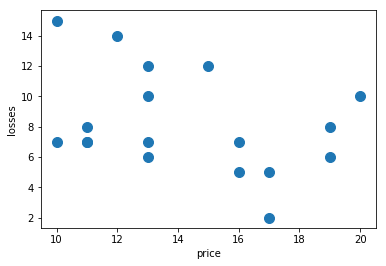

In [55]:
teams_pd.plot.scatter(x='price', y='losses', s=100)

In [56]:
del teams_pd['teamName']
teams_pd

,losses,price
0,2,17
1,5,17
2,6,19
3,5,16
4,7,16
5,6,13
6,7,11
7,8,11
8,8,19
9,10,20


In [57]:
whitened = whiten(teams_pd.as_matrix())
whitened

array([[ 0.61379491,  5.38919515],
       [ 1.53448726,  5.38919515],
       [ 1.84138472,  6.0232181 ],
       [ 1.53448726,  5.07218367],
       [ 2.14828217,  5.07218367],
       [ 1.84138472,  4.12114923],
       [ 2.14828217,  3.48712627],
       [ 2.45517962,  3.48712627],
       [ 2.45517962,  6.0232181 ],
       [ 3.06897453,  6.34022958],
       [ 2.14828217,  3.17011479],
       [ 2.14828217,  3.48712627],
       [ 3.68276943,  4.12114923],
       [ 2.14828217,  4.12114923],
       [ 3.06897453,  4.12114923],
       [ 3.68276943,  4.75517219],
       [ 4.29656434,  3.80413775],
       [ 4.60346179,  3.17011479]])

In [58]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

(array([[ 1.22758981,  5.28352465],
        [ 2.92947569,  3.80413775],
        [ 2.37845526,  5.86471236]]),
 array([0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1]))

In [59]:
colors_map = {0: 'r', 1: 'g', 2: 'b'}
colors = [colors_map[c] for c in cluster_map]
colors

['r',
 'r',
 'b',
 'r',
 'b',
 'g',
 'g',
 'g',
 'b',
 'b',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g']

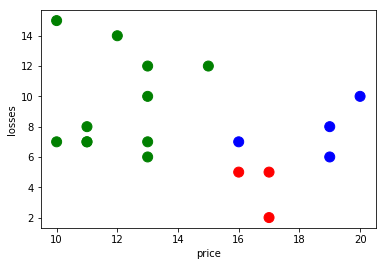

In [60]:
teams_pd.plot.scatter(x='price', y='losses', c=colors, s=100)

In [62]:
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

(array([[ 4.45001307,  3.48712627],
        [ 1.53448726,  5.38919515],
        [ 2.76207707,  6.18172384],
        [ 3.47817113,  4.33249022],
        [ 2.14828217,  3.64563201]]),
 array([1, 1, 1, 1, 1, 4, 4, 4, 2, 2, 4, 4, 3, 4, 3, 3, 0, 0]))

In [63]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['g',
 'g',
 'g',
 'g',
 'g',
 'm',
 'm',
 'm',
 'b',
 'b',
 'm',
 'm',
 'y',
 'm',
 'y',
 'y',
 'r',
 'r']

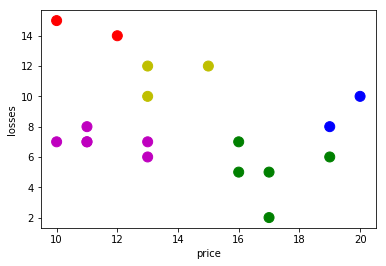

In [64]:
teams_pd.plot.scatter(x='price', y='losses', c=colors, s=100)